In [1]:
import pandas as pd
import geopandas
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt

In [15]:
data = pd.read_csv("Non-Traffic-Citations.csv")

citations_In_Neighborhood = data.groupby("NEIGHBORHOOD").size()

d2 = pd.DataFrame( {"number of citations" : citations_In_Neighborhood} )

d2.reset_index(inplace=True)

d2.columns = [ " Number of Citations " , " Neighborhood " ]

print( d2 )

    Number of Citations    Neighborhood 
0       Allegheny Center             157
1         Allegheny West              24
2              Allentown             187
3              Arlington             102
4      Arlington Heights               7
..                   ...             ...
92   Upper Lawrenceville              34
93              West End              31
94          West Oakland              63
95              Westwood              36
96               Windgap              16

[97 rows x 2 columns]


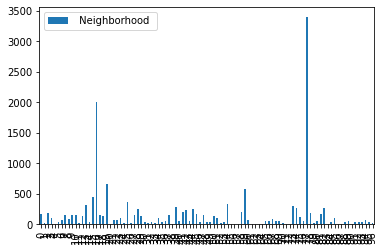

In [16]:
d2.plot(kind="bar")